In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


In [2]:
# Fetch the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get coefficients
coefficients = lr.coef_

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

# Intercept
print(f"Intercept: {lr.intercept_}")


      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708
Intercept: -37.023277706064064


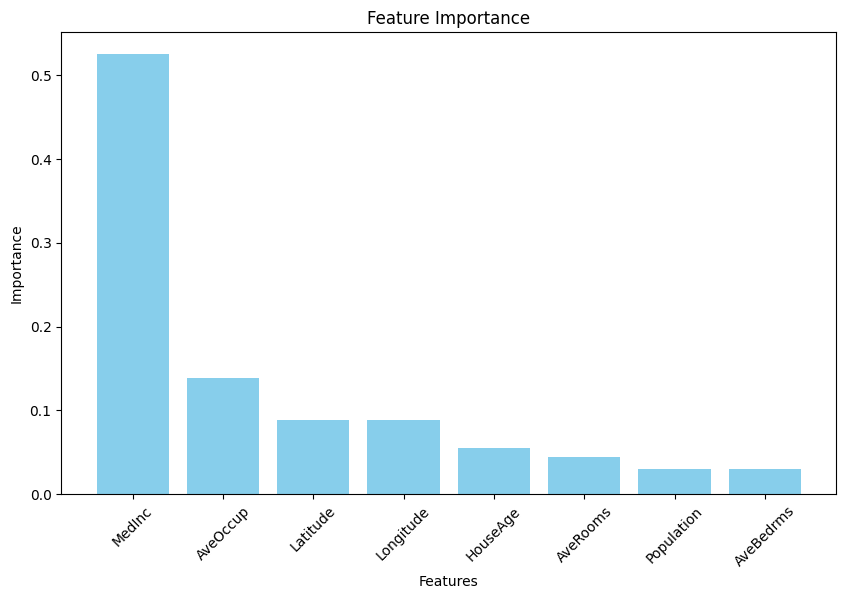

In [4]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


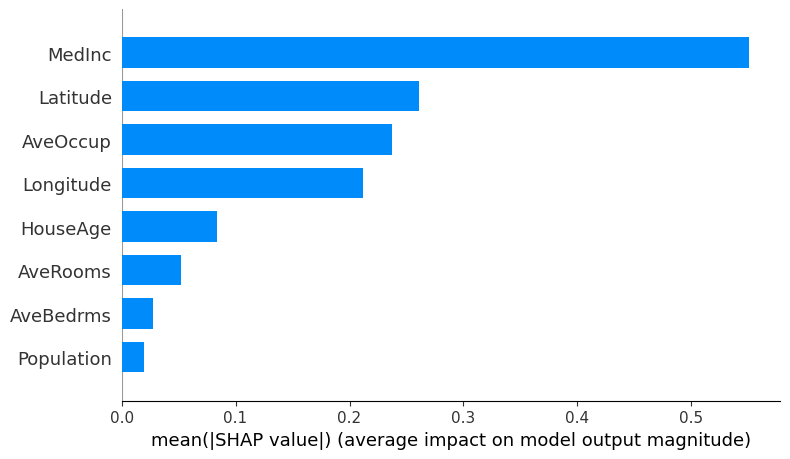

In [6]:
import shap

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot for the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

Major downside of shap is just slow af. 
https://github.com/shap/shap/issues/77

This is a known issue - what are potential ways to speed up the process?


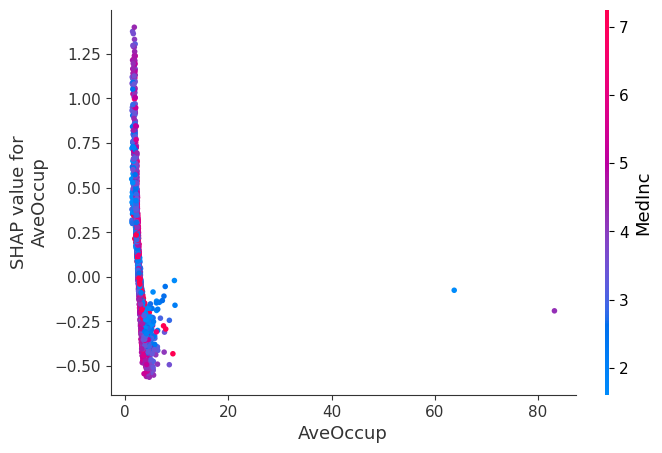

In [12]:
shap.dependence_plot("AveOccup", shap_values, X_test)

I dont know what I am look at tbh.

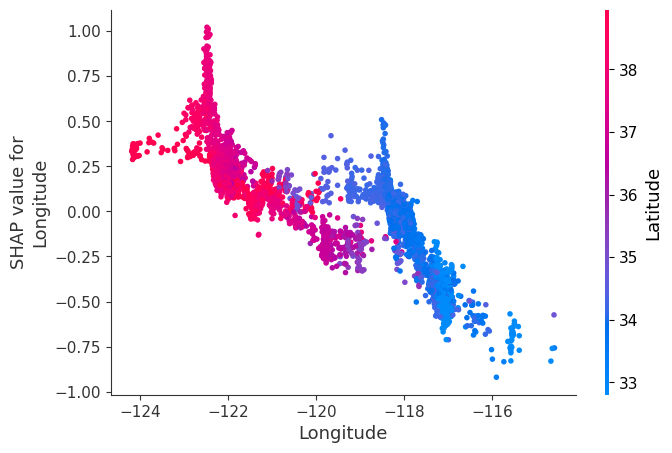

In [13]:
shap.dependence_plot("Longitude", shap_values, X_test)

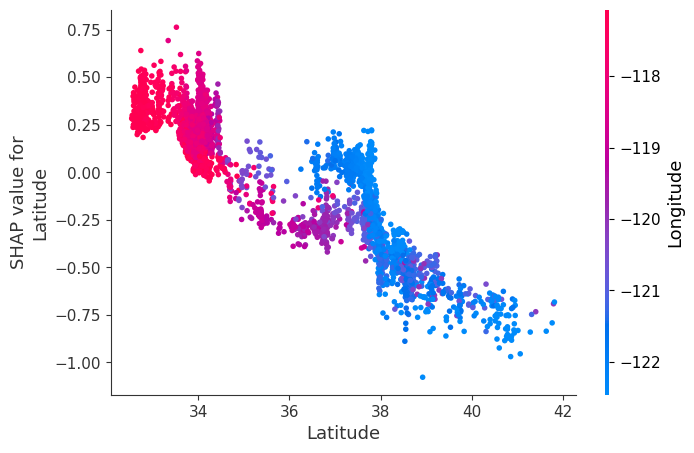

In [11]:
shap.dependence_plot("Latitude", shap_values, X_test)

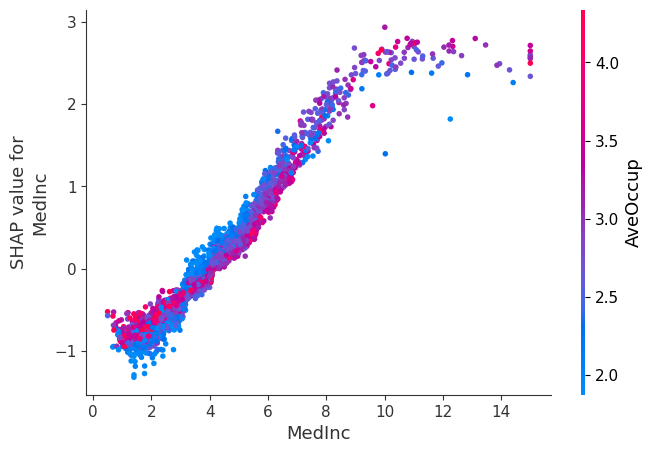

In [7]:
shap.dependence_plot("MedInc", shap_values, X_test)

In [8]:
shap.initjs() # Initialize JavaScript in Jupyter Notebook for visualization
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

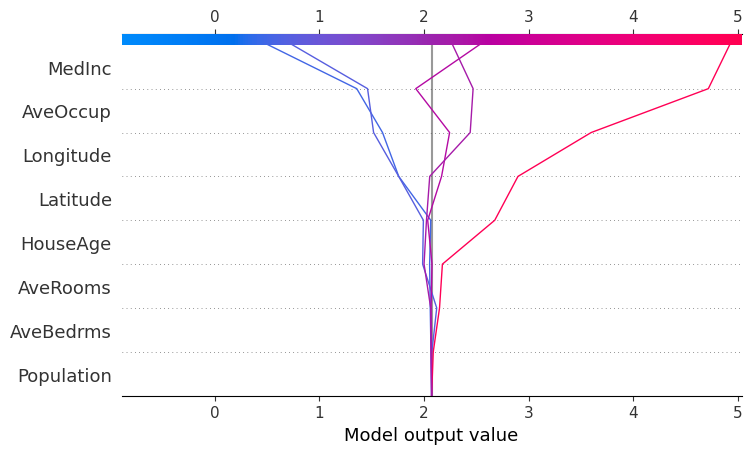

In [10]:
shap.decision_plot(explainer.expected_value, shap_values[:5], X_test.iloc[:5])